Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [16]:
library('tidyverse')
library('readr')
library('moderndive')
library('recipes')
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ rsample      1.3.1
✔ dials        1.4.1     ✔ tune         1.3.0
✔ infer        1.0.9     ✔ workflows    1.3.0
✔ modeldata    1.5.1     ✔ workflowsets 1.1.1
✔ parsnip      1.3.3     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [5]:
hate_crimes <- read.csv("http://bit.ly/2ItxYg3")

summary(hate_crimes)


    state           median_house_inc   share_pop_metro        hs       
 Length:51          Length:51          Min.   :0.3100   Min.   :80.00  
 Class :character   Class :character   1st Qu.:0.6300   1st Qu.:84.00  
 Mode  :character   Mode  :character   Median :0.7900   Median :87.00  
                                       Mean   :0.7502   Mean   :86.79  
                                       3rd Qu.:0.8950   3rd Qu.:90.00  
                                       Max.   :1.0000   Max.   :92.00  
                                                        NA's   :3      
  hate_crimes     trump_support      unemployment       urbanization      
 Min.   :0.0670   Length:51          Length:51          Length:51         
 1st Qu.:0.1430   Class :character   Class :character   Class :character  
 Median :0.2260   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.3041                                                           
 3rd Qu.:0.3570                                  

Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_parallel_slopes()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


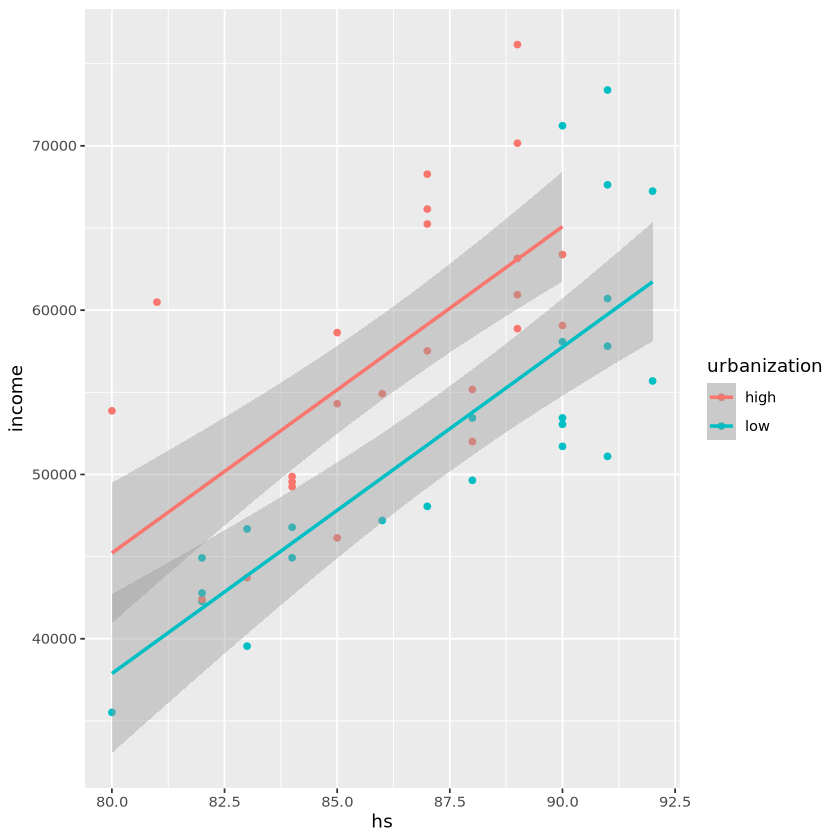

In [11]:
p = ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) + geom_point() + geom_parallel_slopes()

p


❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

High Urbanization appears to have the larger intercept.

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


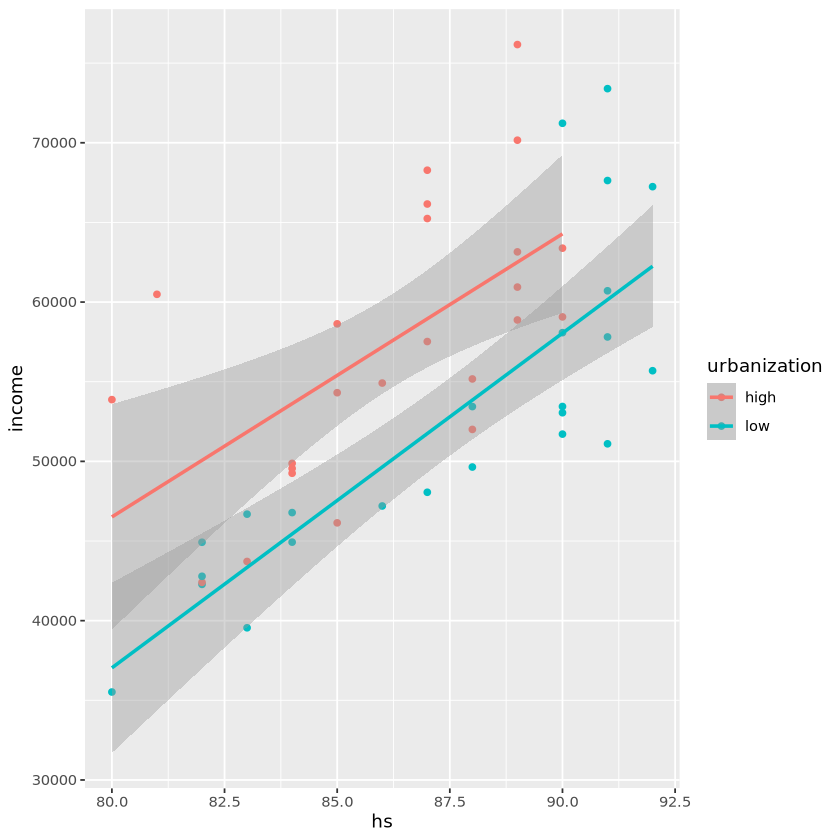

In [9]:
p = ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) + geom_point() + geom_smooth(method = 'lm')

p


❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

An interaction model would be interesting and potentially worth looking into, but given the near complete lack of overlap beteen the confidence intervals of these two lines and the generally parallel nature of them, I think it is probably unneccessary.


Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [17]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [20]:
# non-parallel slopes model

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...





parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [26]:
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)



income,.pred,.resid,model
<int>,<dbl>,<dbl>,<chr>
46686,43845.37,2840.63106,parallel_slopes
51710,57752.93,-6042.92572,parallel_slopes
54310,55152.28,-842.28220,parallel_slopes
54916,57139.08,-2223.07603,parallel_slopes
57522,59125.87,-1603.86985,parallel_slopes
58633,55152.28,3480.71780,parallel_slopes
58875,63099.46,-4224.45751,parallel_slopes
59068,65086.25,-6018.25133,parallel_slopes
60487,47205.11,13281.89310,parallel_slopes


In [28]:
library(dplyr)

r2_results <- rbind(
  augment(ps_mod, juice(ps_rec)) |> 
    select(income, .pred, .resid) |> 
    mutate(model = "parallel_slopes"),
  
  augment(nps_mod, juice(nps_rec)) |> 
    select(income, .pred, .resid) |> 
    mutate(model = "interaction")
) |>
  group_by(model) |>
  summarise(
    r2 = 1 - sum((income - .pred)^2) / sum((income - mean(income))^2)
  )

r2_results


model,r2
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [33]:
glance(ps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

The adjusted r-squared value (more representative of model quality), is a bit higher for the non-interactive model. Since it is both better and simpler, you should go with the parallel slopes model.



❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [34]:
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


Low urbanization income will typically be around $7333.33 lower given all else is held equal.

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

Each percentage point increase is associated with an increrase in average income of around $1986.79.

